c:\Users\ethan\Documents\GitHub\me241
The weight of the beam is 1424.0
The slope equation is -l*p*x/(E*I) + p*x**2/(2*E*I)
The deflection equation is -l*p*x**2/(2*E*I) + p*x**3/(6*E*I)
The slope value at the point 4 is -0.0000493336692929277
The deflection value at the point 4 is -0.00131556451447807
The moment equation is -p*(l - x)
The shear equation is p


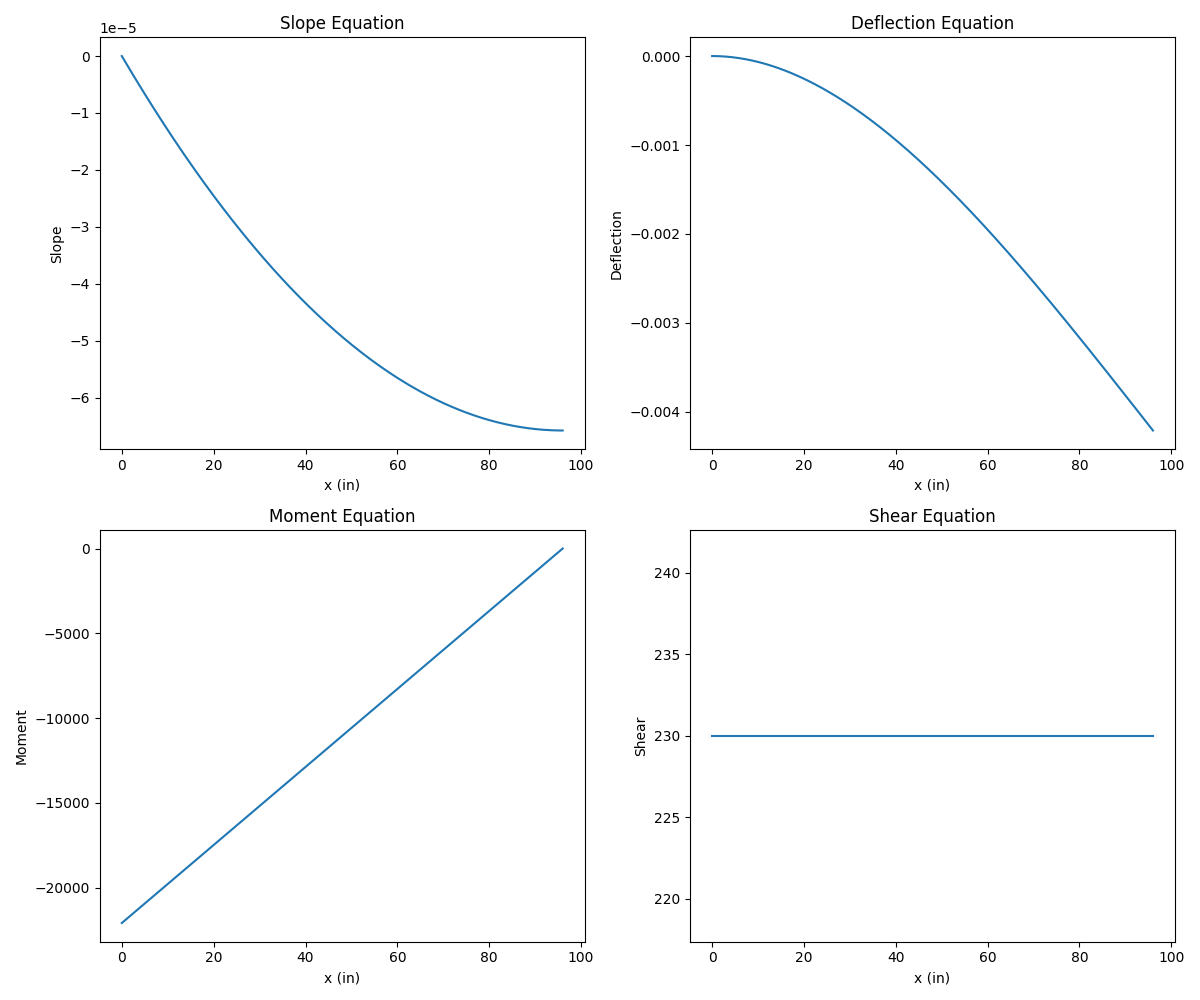

In [7]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sympy import symbols, integrate, solve, diff, lambdify
from scipy.integrate import solve_ivp
from PIL import Image
import urllib.request
from ipywidgets import interactive
from IPython.display import display
import os
print(os.getcwd())

x, p, c1, c2, c3, c4, m0, w, l, E, I = symbols('x p c1 c2 c3 c4 m0 w l E I')
data = np.loadtxt('https://raw.githubusercontent.com/NotInIreland/me241/refs/heads/main/W%20flange%20beams%20sae%20table.csv', dtype=str, skiprows=5, delimiter=',')
id = data[:,0] #identification
depth = data[:,1]
width = data[:,2]
webThick = data[:,3] #web thickness
fThick = data[:,4] #flange thickness
weight = data[:,6]
#dimension = input("What are your beam dimensions? An example input is W 27 x 178")
dimension = 'W 27 x 178'
#beamload = input("What kind of load is on the beam? Your options are intermediate load(IL), uniformly distributed load(UL), triangular distributed load(TL), and moment(M)")
beamload = 'il'
beamload = beamload.lower()
#L = float(input("What is the length of the beam (in ft)"))
L = 8
#Ei = float(input("What is young's modulus for this beam (E value)? This is with assumed units of psi"))
Ei = 29000000
#evalpoint = float(input("Where would you like to evaluate the deflection at, starting with 0 on the left side (in ft)"))
evalpoint = 4



#inertia
def inertia(dimension):
    for i in range(0, len(id)):
        d1 = float(depth[i])
        w1 = float(width[i])
        wt1 = float(webThick[i])
        ft1 = float(fThick[i])
        wh = d1-(2*ft1)
        if id[i] == dimension:
            I = 2*((ft1 * (w1**3))/12)+((wh*(wt1**3))/12)
            break
        else:
            I = 'Unreadable input. Please input dimesion of standard designation including spaces. Example: W # x #.'
    return I

Iin = inertia(dimension)

def W(dimension):
    for i in range(0, len(id)):
        weight1 = weight[i]
        if id[i] == dimension:
            W = float(weight1)
            break
        else:
            W = 'Unreadable input. Please input dimesion of standard designation including spaces. Example: W # x #.'
    return W

def slopecalculate(mgiven, E, I):
    return integrate(mgiven / (E * I), x) + c1
     
def defleccalculate(slopeq):
    return integrate(slopeq, x) + c2 

def values(mgiven, E, I, epointi):
    slopeq = slopecalculate(mgiven, E, I)
    deflecq = defleccalculate(slopeq)

    slopeb = slopeq.subs(x, 0)
    deflecb = deflecq.subs(x, 0)

    c1val = solve(slopeb, c1)[0]
    c2val = solve(deflecb, c2)[0]

    slopec = slopeq.subs(c1, c1val)
    deflectionc = deflecq.subs({c1: c1val, c2: c2val})
    slopeval = slopec.subs(x, epointi).evalf()
    deflecval = deflectionc.subs(x, epointi).evalf()
    return slopeval, deflecval, slopec, deflectionc

if beamload == 'il':
    l1i = L * 12
    x1 = float(input("Where is the load on the beam, starting with 0 on the left side (in ft)"))
    x1i = x1 * 12
    p1 = float(input("What is the load on the beam in units of lbs"))

    mgiven = -p * (l - x)
    epointi = evalpoint * 12
    slopeval, deflecval, slopec, deflectionc = values(mgiven, E, I, epointi)
    wfrac = W(dimension)
    beamweight = L * wfrac
    shear = diff(mgiven, x)
    slopeval = slopeval.subs({p: p1, l: l1i, E: Ei, I: Iin})
    deflecval = deflecval.subs({p: p1, l: l1i, E: Ei, I: Iin})
    print(f'The weight of the beam is {beamweight}')
    print(f'The slope equation is {slopec}')
    print(f'The deflection equation is {deflectionc}')
    print(f'The slope value at the point {evalpoint} is {slopeval}')
    print(f'The deflection value at the point {evalpoint} is {deflecval}')
    print(f"The moment equation is {mgiven}")
    print(f"The shear equation is {shear}")

    # Define the equations as functions


    # Generate x values in inches
    x_vals = np.linspace(0, L * 12, 400)

    # Calculate y values for each equation


    # Plot the equations
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Calculate y values for slope equation
    slope_func = lambdify(x, slopec.subs({p: p1, l: l1i, E: Ei, I: Iin}), 'numpy')
    slope_vals = slope_func(x_vals)

    # Plot slope equation
    axs[0, 0].plot(x_vals, slope_vals)
    axs[0, 0].set_title('Slope Equation')
    axs[0, 0].set_xlabel('x (in)')
    axs[0, 0].set_ylabel('Slope')

    # Calculate y values for deflection equation
    deflection_func = lambdify(x, deflectionc.subs({p: p1, l: l1i, E: Ei, I: Iin}), 'numpy')
    deflection_vals = deflection_func(x_vals)

    # Plot deflection equation
    axs[0, 1].plot(x_vals, deflection_vals)
    axs[0, 1].set_title('Deflection Equation')
    axs[0, 1].set_xlabel('x (in)')
    axs[0, 1].set_ylabel('Deflection')

    # Calculate y values for moment equation
    moment_func = lambdify(x, mgiven.subs({p: p1, l: l1i}), 'numpy')
    moment_vals = moment_func(x_vals)

    # Plot moment equation
    axs[1, 0].plot(x_vals, moment_vals)
    axs[1, 0].set_title('Moment Equation')
    axs[1, 0].set_xlabel('x (in)')
    axs[1, 0].set_ylabel('Moment')

    # Calculate y values for shear equation
    shear_func = lambdify(x, shear.subs({p: p1}), 'numpy')
    shear_vals = np.array([shear_func(val) for val in x_vals])

    # Plot shear equation
    axs[1, 1].plot(x_vals, shear_vals)
    axs[1, 1].set_title('Shear Equation')
    axs[1, 1].set_xlabel('x (in)')
    axs[1, 1].set_ylabel('Shear')
    

    plt.tight_layout()
    plt.show()



c:\Users\ethan\Documents\GitHub\me241


C:\Users\ethan\AppData\Local\Temp\ipykernel_6336\1742417808.py:92: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(10, 10))


interactive(children=(IntSlider(value=50, description='w2', min=1), Output()), _dom_classes=('widget-interact'…

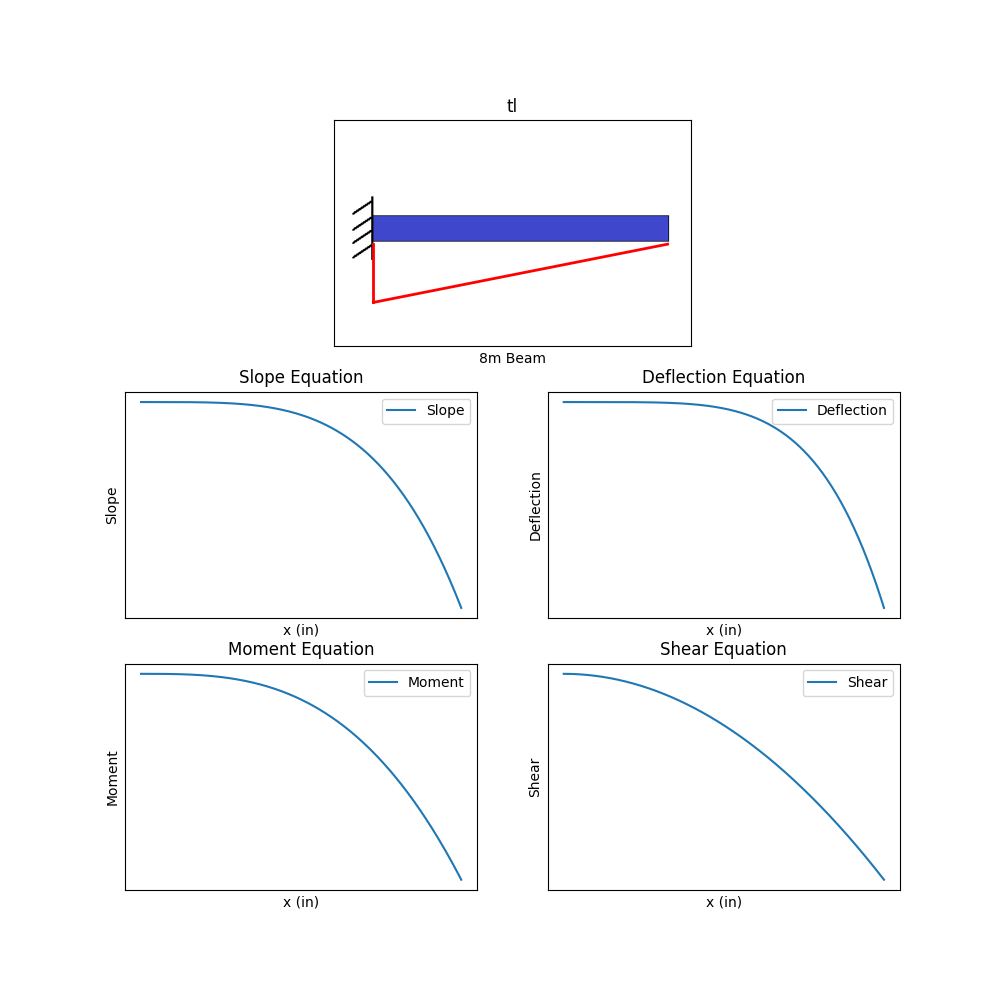

In [21]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sympy import symbols, integrate, solve, diff, lambdify
from scipy.integrate import solve_ivp
from PIL import Image
import urllib.request
from ipywidgets import interactive
from IPython.display import display
import os
print(os.getcwd())

x, p, c1, c2, c3, c4, m0, w, l, E, I = symbols('x p c1 c2 c3 c4 m0 w l E I')
data = np.loadtxt('https://raw.githubusercontent.com/NotInIreland/me241/refs/heads/main/W%20flange%20beams%20sae%20table.csv', dtype=str, skiprows=5, delimiter=',')
id = data[:,0] #identification
depth = data[:,1]
width = data[:,2]
webThick = data[:,3] #web thickness
fThick = data[:,4] #flange thickness
weight = data[:,6]
#dimension = input("What are your beam dimensions? An example input is W 27 x 178")
dimension = 'W 27 x 178'
#beamload = input("What kind of load is on the beam? Your options are intermediate load(IL), uniformly distributed load(UL), triangular distributed load(TL), and moment(M)")
beamload = 'tl'
beamload = beamload.lower()
#L = float(input("What is the length of the beam (in ft)"))
L = 8
#Ei = float(input("What is young's modulus for this beam (E value)? This is with assumed units of psi"))
Ei = 29000000
#evalpoint = float(input("Where would you like to evaluate the deflection at, starting with 0 on the left side (in ft)"))
evalpoint = 4

#inertia
def inertia(dimension):
    for i in range(0, len(id)):
        d1 = float(depth[i])
        w1 = float(width[i])
        wt1 = float(webThick[i])
        ft1 = float(fThick[i])
        wh = d1-(2*ft1)
        if id[i] == dimension:
            I = 2*((ft1 * (w1**3))/12)+((wh*(wt1**3))/12)
            break
        else:
            I = 'Unreadable input. Please input dimesion of standard designation including spaces. Example: W # x #.'
    return I

Iin = inertia(dimension)

def W(dimension):
    for i in range(0, len(id)):
        weight1 = weight[i]
        if id[i] == dimension:
            W = float(weight1)
            break
        else:
            W = 'Unreadable input. Please input dimesion of standard designation including spaces. Example: W # x #.'
    return W

def slopecalculate(mgiven, E, I):
    return integrate(mgiven / (E * I), x) + c1
     
def defleccalculate(slopeq):
    return integrate(slopeq, x) + c2 

def values(mgiven, E, I, epointi):
    slopeq = slopecalculate(mgiven, E, I)
    deflecq = defleccalculate(slopeq)

    slopeb = slopeq.subs(x, 0)
    deflecb = deflecq.subs(x, 0)

    c1val = solve(slopeb, c1)[0]
    c2val = solve(deflecb, c2)[0]

    slopec = slopeq.subs(c1, c1val)
    deflectionc = deflecq.subs({c1: c1val, c2: c2val})
    slopeval = slopec.subs(x, epointi).evalf()
    deflecval = deflectionc.subs(x, epointi).evalf()
    return slopeval, deflecval, slopec, deflectionc



#Input = input('Would you like to solve graphically?, yes/no?')
Input = 'yes'
request = Input.lower()
dtype = type(request)
if dtype == str:
    if request == 'yes':
        title = beamload 
        fig = plt.figure(figsize=(10, 10))
        gs = fig.add_gridspec(3, 2)
        ax1 = fig.add_subplot(gs[0, :])
        fixed = 'https://raw.githubusercontent.com/NotInIreland/me241/refs/heads/main/fixed.png'
        open = urllib.request.urlopen(fixed)
        img = Image.open(open)
        if beamload == 'il':
            print(123)
        elif beamload == 'ul':
            print(456)
        elif beamload == 'm':
            print(789)
        elif beamload == 'tl':
            f = input("Is the load on the beam pushing down? yes/no")
            f = f.lower()
            def update(w2):
                ax1.clear()
                ax1.imshow(img)
                ax1.set_xticks([])  # Remove x-axis ticks
                ax1.set_yticks([])  # Remove y-axis ticks
                ax1.set_title(title)
                ax1.set_xlabel(f'{L}m Beam')

                    # Draw triangular load
                if f == 'yes':
                    arrow_x, arrow_y = 53, 130  # Coordinates where the arrow should point
                    ax1.plot([53, 457], [50, 132], color='red', linewidth=2)
                    ax1.plot([53, 53], [50, 132], color='red', linewidth=2)
                    for offset in range(0, 320, 40):
                        ax1.plot([arrow_x + offset, arrow_x + offset], [arrow_y - 5, arrow_y - 40], color='red', linewidth=2)
                        ax1.annotate(
                            '   F',  # Text for the arrow
                            xy=(arrow_x + offset, arrow_y),  # End point of the arrow
                            xytext=(arrow_x + offset, arrow_y - 20),  # Start point of the arrow (20 pixels above the end point)
                            arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=10)
                        )
                else:
                    ax1.plot([53, 457], [250, 170], color='red', linewidth=2)
                    ax1.plot([53, 53], [250, 170], color='red', linewidth=2)

                l1i = L * 12
                w2 = w2 * L

                mgiven = (-1 / 6) * w * (x**3 / l)
                epointi = evalpoint * 12
                slopeval, deflecval, slopec, deflectionc = values(mgiven, E, I, epointi)                
                shear = diff(mgiven, x)
                slopeval = slopeval.subs({w: w2, l: l1i, E: Ei, I: Iin})
                deflecval = deflecval.subs({w: w2, l: l1i, E: Ei, I: Iin})


                x_vals = np.linspace(0, L * 12, 500)
                f1 = lambdify(x, shear.subs({w: w2, l: l1i}), 'numpy')
                f1x = f1(x_vals)
                f2 = lambdify(x, mgiven.subs({w: w2, l: l1i}), 'numpy')
                f2x = f2(x_vals)
                f3 = lambdify(x, deflectionc.subs({w: w2, l: l1i, E: Ei, I: Iin}), 'numpy')
                f3x = f3(x_vals)
                f4 = lambdify(x, slopec.subs({w: w2, l: l1i, E: Ei, I: Iin}), 'numpy')
                f4x = f4(x_vals)


                ax2 = fig.add_subplot(gs[1, 0])
                ax3 = fig.add_subplot(gs[1, 1])
                ax4 = fig.add_subplot(gs[2, 0])
                ax5 = fig.add_subplot(gs[2, 1])

                ax2.plot(x_vals, f4x, label='Slope')
                ax2.set_title('Slope Equation')
                ax2.set_xlabel('x (in)')
                ax2.set_ylabel('Slope')
                ax2.set_xticks([])  # Remove x-axis ticks
                ax2.set_yticks([])  # Remove y-axis ticks
                ax2.legend()

                ax3.plot(x_vals, f3x, label='Deflection')
                ax3.set_title('Deflection Equation')
                ax3.set_xlabel('x (in)')
                ax3.set_ylabel('Deflection')
                ax3.set_xticks([])  # Remove x-axis ticks
                ax3.set_yticks([])  # Remove y-axis ticks                
                ax3.legend()

                ax4.plot(x_vals, f2x, label='Moment')
                ax4.set_title('Moment Equation')
                ax4.set_xlabel('x (in)')
                ax4.set_ylabel('Moment')
                ax4.set_xticks([])  # Remove x-axis ticks
                ax4.set_yticks([])  # Remove y-axis ticks                
                ax4.legend()

                ax5.plot(x_vals, f1x, label='Shear')
                ax5.set_title('Shear Equation')
                ax5.set_xlabel('x (in)')
                ax5.set_ylabel('Shear')
                ax5.set_xticks([])  # Remove x-axis ticks
                ax5.set_yticks([])  # Remove y-axis ticks                
                ax5.legend()
                
            fig.canvas.draw()
            interactive_plot = interactive(update, w2=(1, 100, 1))
            display(interactive_plot)

            interactive_plot.children[0].description = 'Magnitude (ft/lbs)'
                